# Principal Component Anlaysis
<hr>

## 0. Import Library
<hr>

In [1]:
# Import libraries

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import time
import math

import warnings
warnings.filterwarnings('ignore')


## 1. Data
<hr>

load the data from the file

In [2]:
data = np.loadtxt('data-pca.txt', delimiter = ',')

x = data[:, 0]
y = data[:, 1]

plot original data points

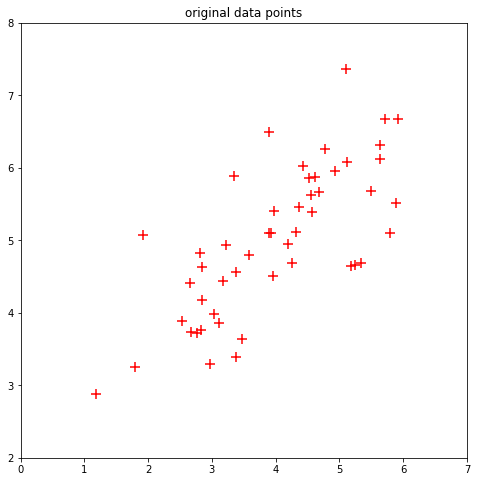

In [3]:
plt.figure(figsize = (8, 8))
plt.scatter(x, y, c = 'red', marker = '+', s = 120) 
plt.title('original data points')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.show()

## 2. Normalize Data
<hr>

define a function to normalize the input data points x and y

In [4]:
def normalize_data(x, y) :
    xn = (x - np.mean(x)) / np.std(x)
    yn = (y - np.mean(y)) / np.std(y)
    
    return xn, yn

plot the normalized data points

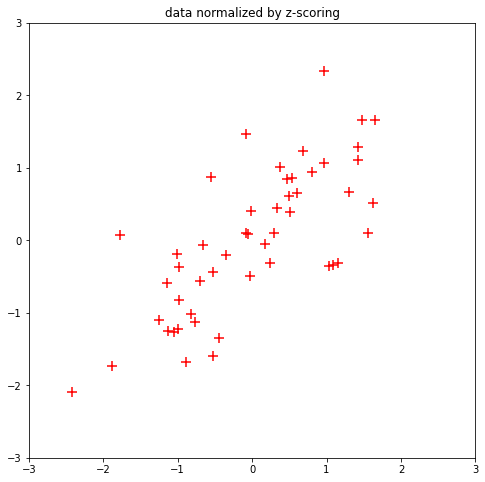

In [5]:
xn, yn = normalize_data(x, y)

plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120) 
plt.title('data normalized by z-scoring')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

## 3. Compute Covariance Matrix
<hr>

define a function to compute the co-variance matrix of the data

In [118]:
def compute_covariance(x, y):
    n = len(x)
    X = np.empty([0, n])
    X = np.append(X, x.reshape(1, -1), axis = 0)
    X = np.append(X, y.reshape(1, -1), axis = 0)
    return X, np.cov(X)

In [120]:
X, covar = compute_covariance2(xn, yn)

print(covar)

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]


## 4. Principal Direction
<hr>

define a function to compute the principal directions from the co-variance matrix

In [121]:
def compute_principal_direction(covariance):

    evals, evecs = np.linalg.eig(covariance)    
    idx = evals.argsort()[::-1]
    evecs = evecs[:, idx]
    evals = evals[idx]
    
    return evecs

In [122]:
evecs = compute_principal_direction(covar)
print(evecs.shape)

(2, 2)


## 5. Compute Projection
<hr>

define a function to compute the projection of the data point onto principal axis

In [127]:
def compute_projection(point, axis):
    
    Z =  np.dot(point.T, axis)
    return Z.T

def generate_from_projection(axis, Z):
    return np.dot(axis, Z)

In [151]:
axis1 = evecs2.T[0]
axis2 = evecs2.T[1]
Z1 = compute_projection(X, axis1)
Z2 = compute_projection(X, axis2)
generateZ1 = generate_from_projection(axis1.reshape(2, -1), Z1.reshape(-1, 50))
generateZ2 = generate_from_projection(axis2.reshape(2, -1), Z2.reshape(-1, 50))

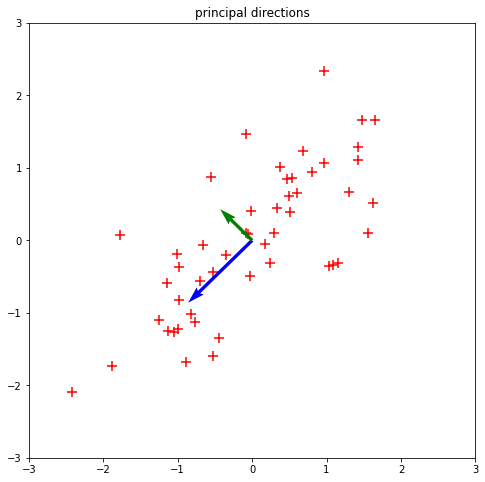

In [165]:
axis1 = -axis1.astype(dtype = 'float64')
axis2 = axis2.astype(dtype = 'float64')

plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.quiver([0], [0], axis1[0], axis1[1], angles = 'xy', color = 'blue', scale = 5)
plt.quiver([0], [0], axis2[0], axis2[1], angles = 'xy', color = 'green', scale = 10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('principal directions')
plt.show()

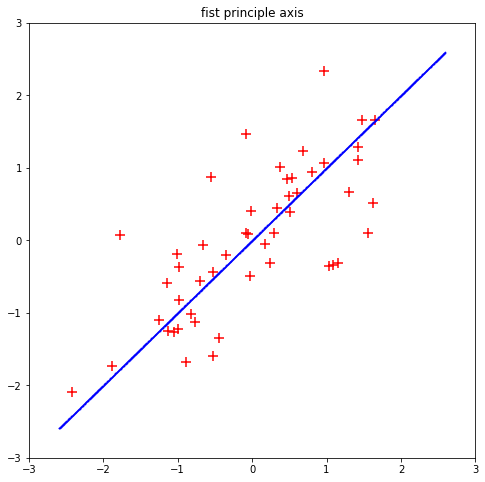

In [168]:
xmin, xmax = xn.min(), xn.max()
xx = np.linspace(xmin, xmax, 1000)

x_line1 = xx.reshape(1, -1)
y_line1 = (-axis1[0] * x_line1 + axis1[1]).reshape(1, -1)

x_line1, y_line1 = normalize_data(x_line1, y_line1)
x_line1, y_line1 = x_line1 * 1.5, y_line1 * 1.5

plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('fist principle axis')
plt.show()

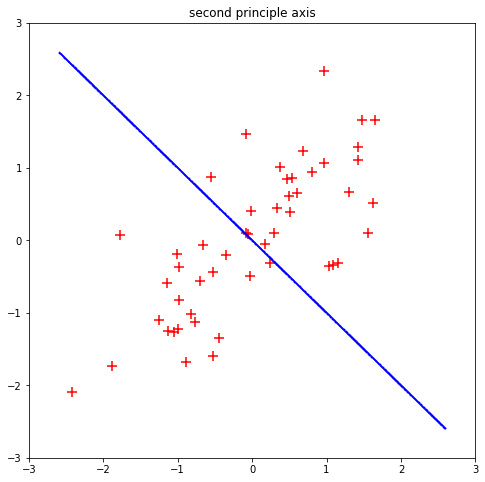

In [182]:
xmin, xmax = xn.min(), xn.max()
xx = np.linspace(xmin, xmax, 1000)

x_line2 = xx.reshape(1, -1)
y_line2 = (axis2[0] * x_line2 + axis2[1]).reshape(1, -1)

x_line2, y_line2 = normalize_data(x_line2, y_line2)
x_line2, y_line2 = x_line2 * 1.5, y_line2 * 1.5

plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line2, y_line2, c = 'blue', s = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('second principle axis')
plt.show()

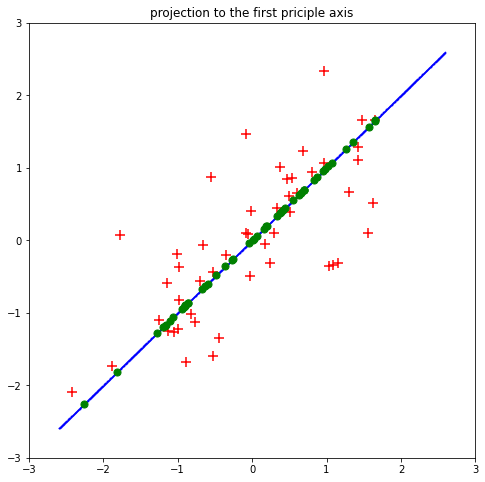

In [169]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 0.5)
plt.scatter(generateZ1[0], generateZ1[1], c = 'green', s = 50)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('projection to the first priciple axis')
plt.show()

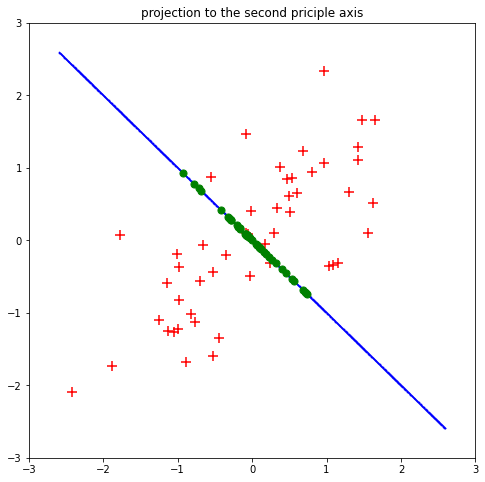

In [185]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line2, y_line2, c = 'blue', s = 0.5)
plt.scatter(generateZ2[0], generateZ2[1], c = 'green', s = 50)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('projection to the second priciple axis')
plt.show()

## 6. Compute Distance
<hr>

compute the Euclidean distance between point1 and point2

In [170]:
def compute_distance(point1, point2):

    distance = np.sum((point1 - point2) ** 2)
    return np.sqrt(distance)

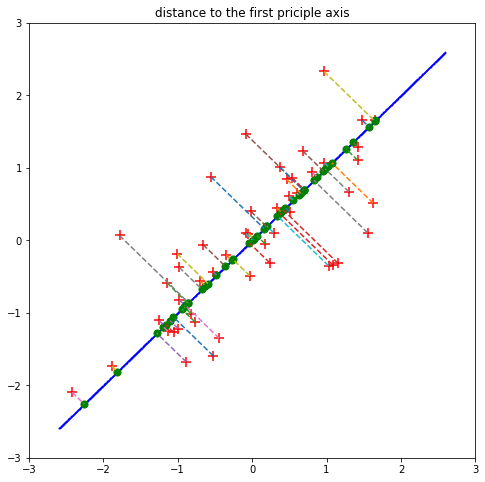

In [171]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 0.5)
plt.scatter(generateZ1[0], generateZ1[1], c = 'green', s = 50)

n = len(xn)

for i in range(0, n):
    x1 = xn[i]
    x2 = generateZ1[0][i]
    y1 = yn[i]
    y2 = generateZ1[1][i]
    plt.plot([x1,x2],[y1,y2],'--')


plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('distance to the first priciple axis')
plt.show()

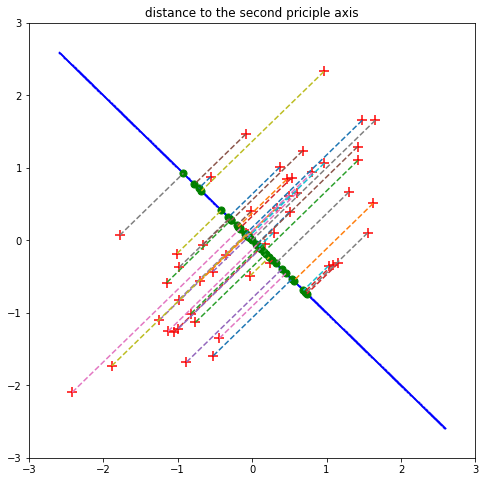

In [187]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line2, y_line2, c = 'blue', s = 0.5)
plt.scatter(generateZ2[0], generateZ2[1], c = 'green', s = 50)

n = len(xn)

for i in range(0, n):
    x1 = xn[i]
    x2 = generateZ2[0][i]
    y1 = yn[i]
    y2 = generateZ2[1][i]
    plt.plot([x1,x2],[y1,y2],'--')


plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('distance to the second priciple axis')
plt.show()

# [Output]
<hr>

## 1. Plot the original data points [1pt]

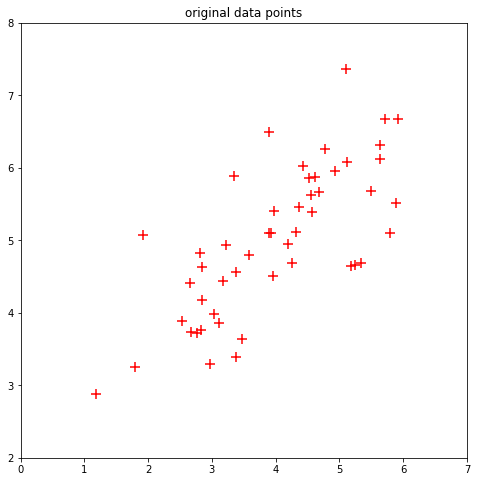

In [172]:
plt.figure(figsize = (8, 8))
plt.scatter(x, y, c = 'red', marker = '+', s = 120) 
plt.title('original data points')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.show()

## 2. Plot the normalized data points [1pt]

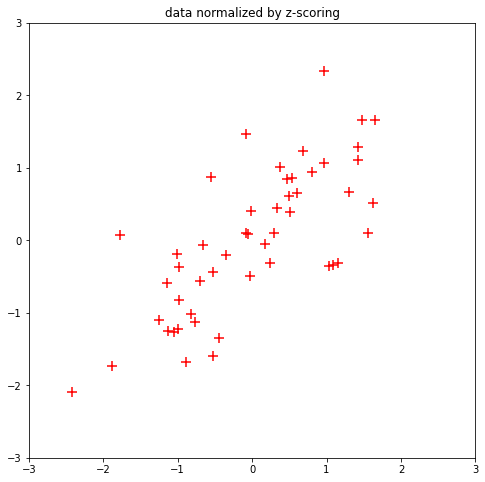

In [173]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120) 
plt.title('data normalized by z-scoring')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

## 3. Plot the principal axes [2pt]

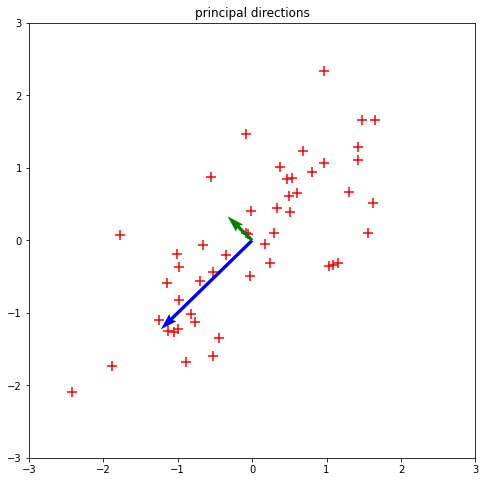

In [178]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.quiver([0], [0], axis1[0], axis1[1], angles = 'xy', color = 'blue', scale = 3.5)
plt.quiver([0], [0], axis2[0], axis2[1], angles = 'xy', color = 'green', scale = 13)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('principal directions')
plt.show()

## 4. Plot the first principal axis [3pt]

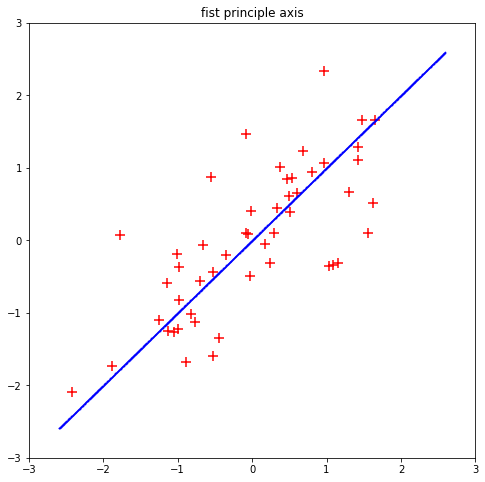

In [179]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('fist principle axis')
plt.show()

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

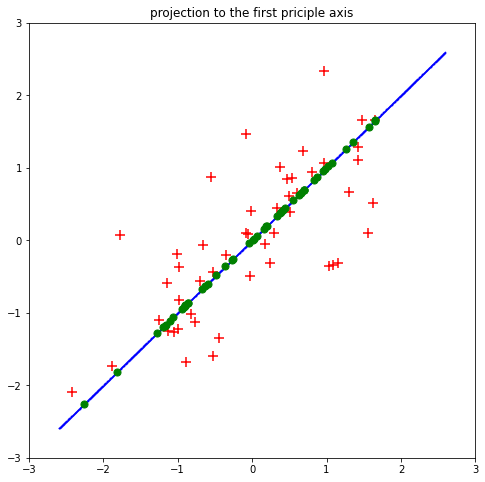

In [180]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 0.5)
plt.scatter(generateZ1[0], generateZ1[1], c = 'green', s = 50)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('projection to the first priciple axis')
plt.show()

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

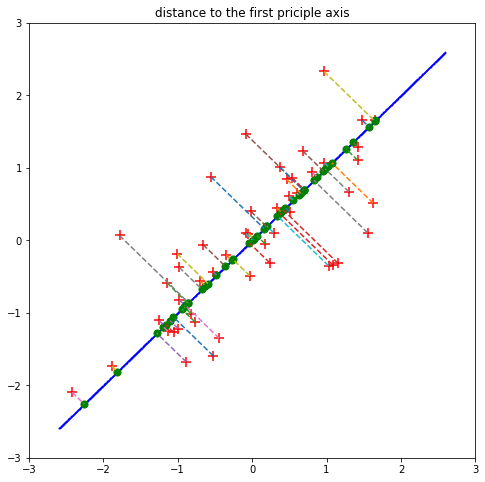

In [181]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 0.5)
plt.scatter(generateZ1[0], generateZ1[1], c = 'green', s = 50)

n = len(xn)

for i in range(0, n):
    x1 = xn[i]
    x2 = generateZ1[0][i]
    y1 = yn[i]
    y2 = generateZ1[1][i]
    plt.plot([x1,x2],[y1,y2],'--')


plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('distance to the first priciple axis')
plt.show()

## 7. Plot the second principal axis [3pt]

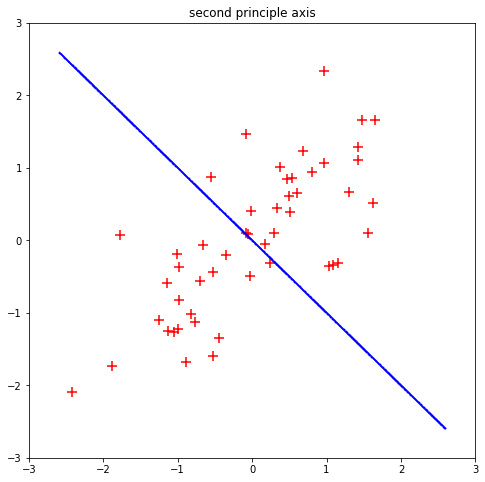

In [183]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line2, y_line2, c = 'blue', s = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('second principle axis')
plt.show()

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

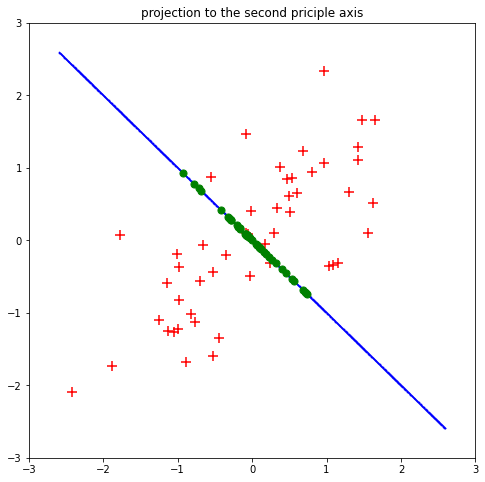

In [186]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line2, y_line2, c = 'blue', s = 0.5)
plt.scatter(generateZ2[0], generateZ2[1], c = 'green', s = 50)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('projection to the second priciple axis')
plt.show()

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]

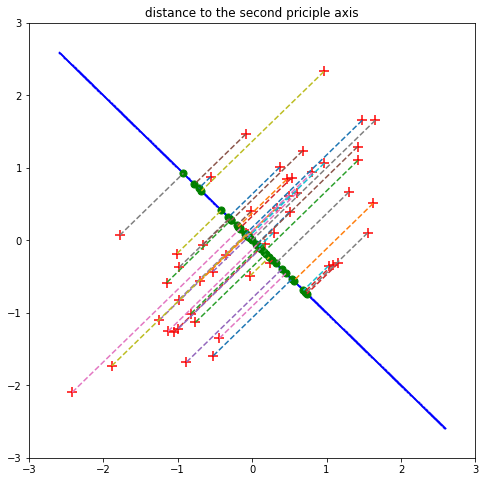

In [188]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line2, y_line2, c = 'blue', s = 0.5)
plt.scatter(generateZ2[0], generateZ2[1], c = 'green', s = 50)

n = len(xn)

for i in range(0, n):
    x1 = xn[i]
    x2 = generateZ2[0][i]
    y1 = yn[i]
    y2 = generateZ2[1][i]
    plt.plot([x1,x2],[y1,y2],'--')


plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('distance to the second priciple axis')
plt.show()